# Phase 3 Project Description

#### This project will use the SyriaTel Customer Churn dataset to explore customer behavior and develop a foundational understanding of the factors that influence customer churn, serving as a basis for building and evaluating machine learning models. 


## Project Overview

#### For this project, I will use exploratory data analysis to prepare and clean the dataset in preparation for building a machine learning model that will predict customer churn rate and generate other useful insights for the stakeholder.

### Business Problem

Syria Telecommunications Company is aiming to cutdown its running costs, reducing the money it loses because of the customers who don't stick around very long. Based on their usage and customer behaviour, I aim to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel.

### Deliverables


#### The deliverables of this project include:
1. Determine which customers are expensive to keep
2. Where can costs be reduced without hurting the revenue generated 
3. Which behaviours signal imminent churn?
Identify the key drivers behind customer churn.

Develop a predictive model to flag customers with a high probability of churning.

Provide actionable recommendations to reduce churn based on model insights.

In [114]:
# importing all the necessary libraries i will be needing to deliver on this project

# pandas and numpy are for data exploration and analysis
import pandas as pd
import numpy as np

# matplotlib & seaborn are for visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# Train_test split to split my training and test data for my model
from sklearn.model_selection import train_test_split

# LogisticRegression is the supervised model i will be using to predict customer churn rate 
from sklearn.linear_model import LogisticRegression
 
# For evaluation of my model
from sklearn.metrics import accuracy_score,confusion_matrix


In [115]:
# Loading and viewing the dataset we are working with
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [116]:
# Getting a better understanding of the columns we are working with, if they have missing values and what are their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Seeing as we have a dataframe with 21 columns and 3334 rows, none being empty, we can proceed to label encode the categorical columns.

In [117]:
# Seeing as our model(or rather most models) require us to use numerical data, we need to convert the categorical columns to numerical so we can work with them.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   state                   3333 non-null   int32
 1   account length          3333 non-null   int64
 2   area code               3333 non-null   int64
 3   phone number            3333 non-null   int32
 4   international plan      3333 non-null   int32
 5   voice mail plan         3333 non-null   int32
 6   number vmail messages   3333 non-null   int64
 7   total day minutes       3333 non-null   int64
 8   total day calls         3333 non-null   int64
 9   total day charge        3333 non-null   int64
 10  total eve minutes       3333 non-null   int64
 11  total eve calls         3333 non-null   int64
 12  total eve charge        3333 non-null   int64
 13  total night minutes     3333 non-null   int64
 14  total night calls       3333 non-null   int64
 15  total night charge   

In [118]:
# checking to see that the categorical columns have been converted.
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,126,1,1926,0,1,19,1491,70,1491,...,60,684,1184,49,657,79,3,79,1,0
1,35,105,1,1575,0,1,20,667,83,667,...,64,668,1265,61,701,116,3,116,1,0
2,31,135,1,1117,0,0,0,1362,74,1362,...,71,150,443,62,292,101,5,101,0,0
3,35,82,0,1707,1,0,0,1625,31,1625,...,49,13,758,47,445,45,7,45,2,0
4,36,73,1,110,1,0,0,711,73,711,...,83,307,664,79,401,80,3,80,3,0


In [119]:
#Checking to see if there are any rows that are duplicated within our dataframe seeing as this skew our model
df.duplicated().sum()

0

### Visualizing the data

#### Let's preliminary explore the data to see what insights we can visualize

##### From the data, let's see which factors contribute highly to churn rate

<AxesSubplot:xlabel='churn', ylabel='customer service calls'>

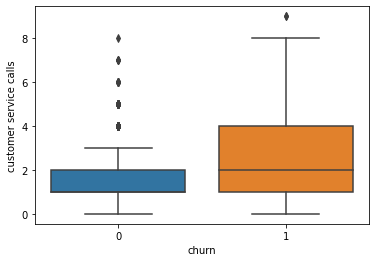

In [120]:
# Looking at the rate of customer service calls and how it affects churn

sns.boxplot(x=df['churn'], y=df['customer service calls'])

##### We can see that majority of the customers that called the service centre between 2-4 times resulted to defaulting from their subscription. This is likely due to unresolved issues. Syria Telecommunications should aim to ensure that customer issues are resolved within the 1st call and if the issues persist, recommend alternatives to their customers.

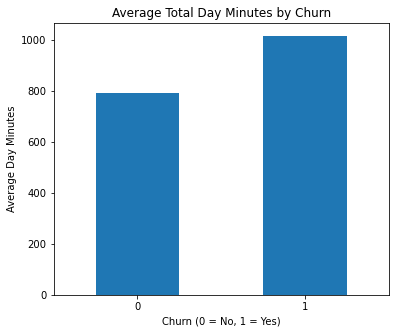

In [121]:
# Visualizing the customer behaviour, that is, are customers who use a lot of day minutes churning?
# Seeing as day minutes usually cost more,this would be a huge indicator that maybe the rates are not favourable.
avg_usage = df.groupby('churn')['total day minutes'].mean()

plt.figure(figsize=(6, 5))
avg_usage.plot(kind='bar')

plt.title('Average Total Day Minutes by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Day Minutes')
plt.xticks(rotation=0)
plt.show()

##### Let's dive into the revenue generated by each customer and see how this will be affected by churn rate

In [122]:
# First start by calculating the total revenue 

# df['total_revenue'] = (
#     df['total day charge'] +
#     df['total eve charge'] +
#     df['total night charge'] +
#     df['total intl charge']
# )

In [123]:
# checking to see which columns are directly correlated with our target variable 'Churn'.
df.corr()['churn'].round(4)

state                     0.0078
account length            0.0163
area code                 0.0033
phone number              0.0056
international plan        0.2599
voice mail plan          -0.1021
number vmail messages    -0.0856
total day minutes         0.1876
total day calls           0.0198
total day charge          0.1876
total eve minutes         0.0903
total eve calls           0.0085
total eve charge          0.0904
total night minutes       0.0361
total night calls         0.0061
total night charge        0.0366
total intl minutes        0.0670
total intl calls         -0.0528
total intl charge         0.0670
customer service calls    0.2087
churn                     1.0000
Name: churn, dtype: float64

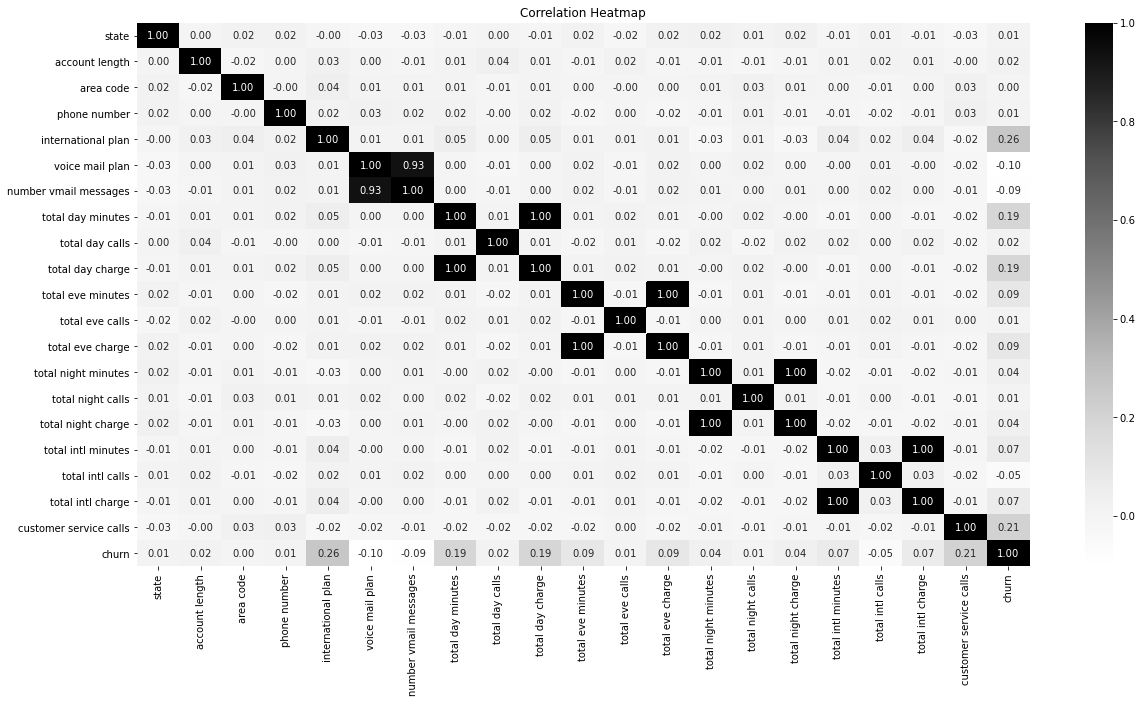

In [124]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greys', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
# Using describe to see if our data is on the same scale, that is, will we need to scale some of these columns to standardize them.
df.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,99.005101,1.000600,1666.00000,0.096910,0.276628,6.440144,826.339634,60.467447,826.339634,...,61.132613,715.447645,793.796580,58.109511,463.044404,81.478548,4.479448,81.478548,1.562856,0.144914
std,14.824911,39.589501,0.709649,962.29855,0.295879,0.447398,11.146322,417.413913,19.893502,417.413913,...,19.806578,352.373293,399.771092,19.515154,209.589781,27.420275,2.461214,27.420275,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,72.000000,0.000000,833.00000,0.000000,0.000000,0.000000,508.000000,47.000000,508.000000,...,48.000000,447.000000,484.000000,45.000000,312.000000,64.000000,3.000000,64.000000,1.000000,0.000000
50%,26.000000,99.000000,1.000000,1666.00000,0.000000,0.000000,0.000000,820.000000,61.000000,820.000000,...,61.000000,717.000000,795.000000,58.000000,462.000000,82.000000,4.000000,82.000000,1.000000,0.000000
75%,39.000000,125.000000,2.000000,2499.00000,0.000000,1.000000,14.000000,1146.000000,74.000000,1146.000000,...,75.000000,982.000000,1103.000000,71.000000,616.000000,100.000000,6.000000,100.000000,2.000000,0.000000
max,50.000000,211.000000,2.000000,3332.00000,1.000000,1.000000,45.000000,1666.000000,118.000000,1666.000000,...,122.000000,1439.000000,1590.000000,119.000000,932.000000,161.000000,20.000000,161.000000,9.000000,1.000000


In [126]:
# seeing as the data is not on the same scale with some columns being in minutes, currency and count, we need to scale the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_scale = ['state', 'account length', 'international plan', 'voice mail plan', 'number vmail messages',
                 'total day minutes', 'total day calls', 'total day charge',
                 'total eve minutes', 'total eve calls', 'total eve charge',
                 'total night minutes', 'total night calls', 'total night charge',
                 'total intl minutes', 'total intl calls', 'total intl charge',
                 'customer service calls']

X = df[columns_scale]
y = df['churn'] 

df[columns_scale] = scaler.fit_transform(X)

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,-0.678649,0.681972,1,1926,-0.327580,1.617086,1.126985,1.592568,0.479251,1.592568,...,-0.057192,-0.089259,0.976214,-0.466862,0.925545,-0.090405,-0.601195,-0.090405,-0.427932,0
1,0.603170,0.151449,1,1575,-0.327580,1.617086,1.216714,-0.381788,1.132829,-0.381788,...,0.144791,-0.134672,1.178860,0.148137,1.135510,1.259164,-0.601195,1.259164,-0.427932,0
2,0.333313,0.909340,1,1117,-0.327580,-0.618396,-0.577869,1.283476,0.680352,1.283476,...,0.498262,-1.604924,-0.877625,0.199387,-0.816214,0.712042,0.211534,0.712042,-1.188218,0
3,0.603170,-0.429600,0,1707,3.052685,-0.618396,-0.577869,1.913641,-1.481482,1.913641,...,-0.612647,-1.993775,-0.089556,-0.569362,-0.086107,-1.330549,1.024263,-1.330549,0.332354,0
4,0.670634,-0.656967,1,110,3.052685,-0.618396,-0.577869,-0.276361,0.630077,-0.276361,...,1.104212,-1.159307,-0.324726,1.070636,-0.296072,-0.053930,-0.601195,-0.053930,1.092641,0


In [127]:
#After scaling, let's have the X & y in one new dataframe moving forward.

import pandas as pd

new_df = pd.concat([X, y], axis=1)
new_df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,126,0,1,19,1491,70,1491,767,60,684,1184,49,657,79,3,79,1,0
1,35,105,0,1,20,667,83,667,748,64,668,1265,61,701,116,3,116,1,0
2,31,135,0,0,0,1362,74,1362,158,71,150,443,62,292,101,5,101,0,0
3,35,82,1,0,0,1625,31,1625,13,49,13,758,47,445,45,7,45,2,0
4,36,73,1,0,0,711,73,711,330,83,307,664,79,401,80,3,80,3,0


In [128]:
# Now let's set our X variables (those with high correlation to churn rate) so we are able to split our train and test data.
selected_variables =['account length', 'international plan','total day minutes', 'total day charge',
                 'total eve minutes', 'total eve charge',
                 'total night minutes', 'total night charge',
                 'total intl minutes', 'total intl charge',
                 'customer service calls']
X1 = new_df[selected_variables]
y1 = new_df['churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.5,random_state=452)


### Logistic Regression

In [129]:
# before instantiating and fitting our model,we need to understand if it is skewed(imbalanced) as this will have an effect on the model outcomes.
new_df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

seeing as there is a big imbalance in the target class, we need to introduce weight, which balances the data as a parameter when instantiating the model

In [130]:
#instantiating and fitting our model
LogR = LogisticRegression(max_iter=1000,class_weight='balanced')
LogR.fit(X1_train,y1_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [137]:
# Predicting our y1 values using the fitted model

y_pred = LogR.predict(X1_test)

### Model Evaluation

#### Accuracy score

In [132]:
churn_accuracy = accuracy_score(y1_test,y_pred)

print(f'Accurancy score of the model fitted:{churn_accuracy:.3f} ({churn_accuracy*100:.1f}%)')

Accurancy score of the model fitted:0.751 (75.1%)


In [133]:
# From the information gathered earlier, i believe that some of the independent variables that exhibit multicollinearity. 
# To resolve this, we use ridge regularization that introduces a penalty to shrink coefficients towards 0 handling multicollinearity.

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=1.0)

rdg.fit(X1_train, y1_train)

y_pred = rdg.predict(X1_test)

In [134]:
LogR.coef_

array([[ 1.08770776e-03,  2.12102429e+00,  7.53054989e-04,
         7.53054989e-04,  6.27272724e-03, -6.35187059e-03,
         4.49853874e-03, -7.45537092e-03,  2.18318280e-03,
         2.18318280e-03,  6.06805630e-01]])

In [135]:
rdg.coef_

array([ 5.88485410e-05,  2.82653450e-01,  6.86673791e-05,  6.86673803e-05,
        1.30629395e-03, -1.41738313e-03,  4.13692188e-04, -6.74810873e-04,
        3.52475771e-04,  3.52475771e-04,  6.47450040e-02])

#### Confusion Matrix

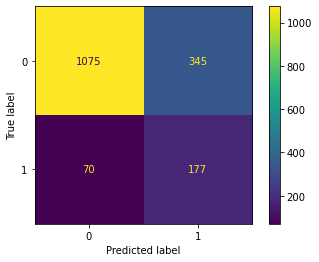

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y1_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

### Decision Tree Classifier

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.5,random_state=452)

In [140]:
#instantiating & fitting the model

dtc = DecisionTreeClassifier(random_state=254)

dtc.fit(X1_train, y1_train)


DecisionTreeClassifier(random_state=254)

In [141]:
# evaluating the model using various metrics
from sklearn.metrics import accuracy_score,auc,roc_curve

#predictions of the dependent variable on the X_test data
y_preds = dtc.predict(X1_test)

In [145]:
#
accuracy_score(y1_test, y_preds)
dtc.predict_proba(X1_test)[:, 1]
# predictions in lr

lr_y_preds = LogR.predict(X1_test)

accuracy_score(y1_test, lr_y_preds)
# #probability for the linear regression model
lr_y_prob = LogR.predict_proba(X1_test)[:, 1]

dtc_y_prob =  dtc.predict_proba(X1_test)[:, 1]

lr_fpr, lr_tpr, i = roc_curve(y1_test, lr_y_prob)

dtc_fpr, dtc_tpr, i = roc_curve(y1_test, dtc_y_prob)

lr_auc = auc(lr_fpr, lr_tpr)
dtc_auc = auc(dtc_fpr, dtc_tpr)

In [144]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y1_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1420
           1       0.34      0.72      0.46       247

    accuracy                           0.75      1667
   macro avg       0.64      0.74      0.65      1667
weighted avg       0.85      0.75      0.78      1667



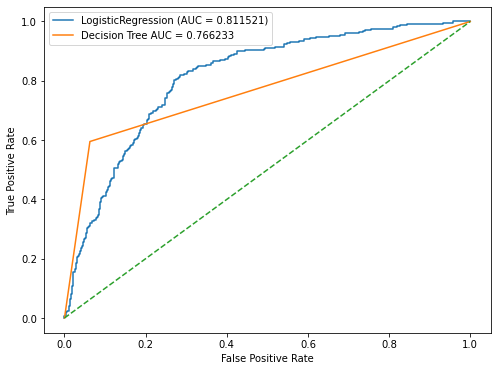

In [146]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'LogisticRegression (AUC = {lr_auc:2f})')
plt.plot(dtc_fpr, dtc_tpr, label=f'Decision Tree AUC = {dtc_auc:2f}')
plt.plot([0,1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Data Preparation

#### Feature Selection
- Dropped phone number as it is a unique identifier with no predictive power.
- Dropped state and area code to simplify the initial model (can be revisited later).
- Dropped total day charge, total eve charge, total night charge, and total intl charge to prevent multicollinearity with the "minutes" features.

#### Encoding
- Mapped international plan and voice mail plan from "yes"/"no" to binary $1/0$.
- Converted the target churn to integer format ($1$ for True, $0$ for False).

#### Train-Test Split
- The data was split into 80% Training and 20% Testing sets.
- Used stratified sampling to ensure the churn distribution remained consistent across both sets.

#### Scaling
- Applied StandardScaler to the training features to normalize numerical values (essential for distance-based models like Logistic Regression).
- The transformation was then applied to the test set using the training parameters to prevent data leakage.